In [27]:
#Import pandas for Dataset Manupilation and matplotlib and seaborn for Visualization
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [28]:
#Import functions for Model, Dataset Splitting and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [29]:
df=pd.read_csv('Datasets/Iris.csv') #Read the Dataset CSV File to a dataframe object

In [30]:
df.shape # To view the shape of our dataset (150 rows and 6 columns)

(150, 6)

In [31]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.info() #Information about the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
df.describe() # Further Statistical Information about the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


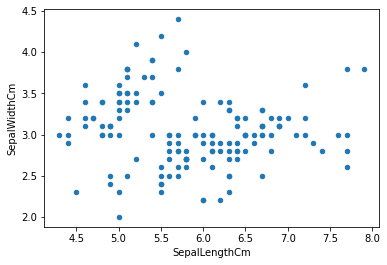

In [34]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm") # Plot the data points (x-Sepal Length and y-Sepal Width)
plt.show()

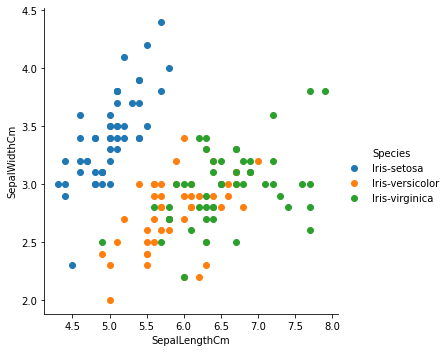

In [35]:
# Plot Sepal Length vs Sepal Width Species Wise
sns.FacetGrid(df, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend() 
plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

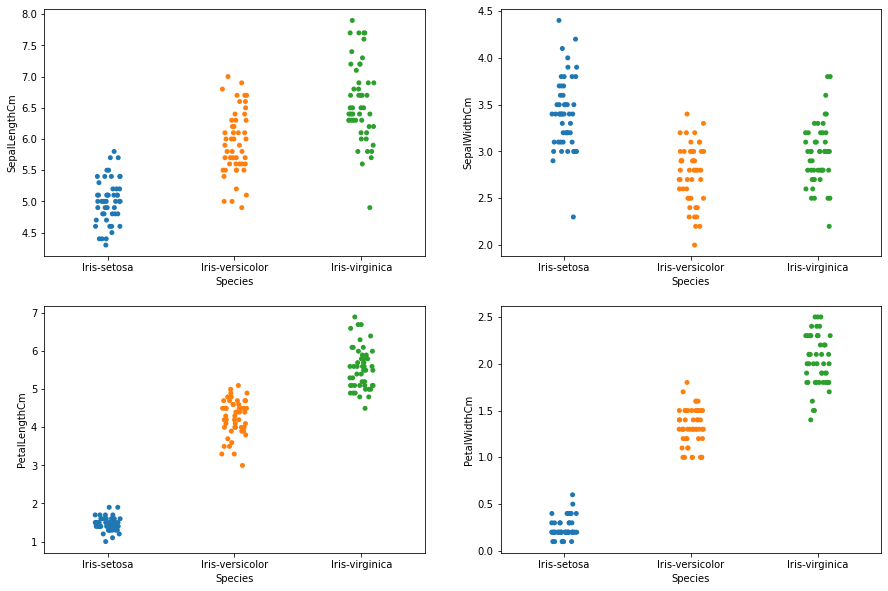

In [36]:
# Display distribution of data points of each class in each attribute
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.stripplot(x = 'Species', y = 'SepalLengthCm', data = df, jitter = True)
plt.subplot(2,2,2)
sns.stripplot(x = 'Species', y = 'SepalWidthCm', data = df, jitter = True)
plt.subplot(2,2,3)
sns.stripplot(x = 'Species', y = 'PetalLengthCm', data = df, jitter = True)
plt.subplot(2,2,4)
sns.stripplot(x = 'Species', y = 'PetalWidthCm', data = df, jitter = True)

In [37]:
#Drop the Id Column and fit Label Encoder on the Species column to encode the categorical values 
df = df.drop(['Id'], axis = 1)
Encoder=LabelEncoder()
df['Species']=Encoder.fit_transform(df['Species'])

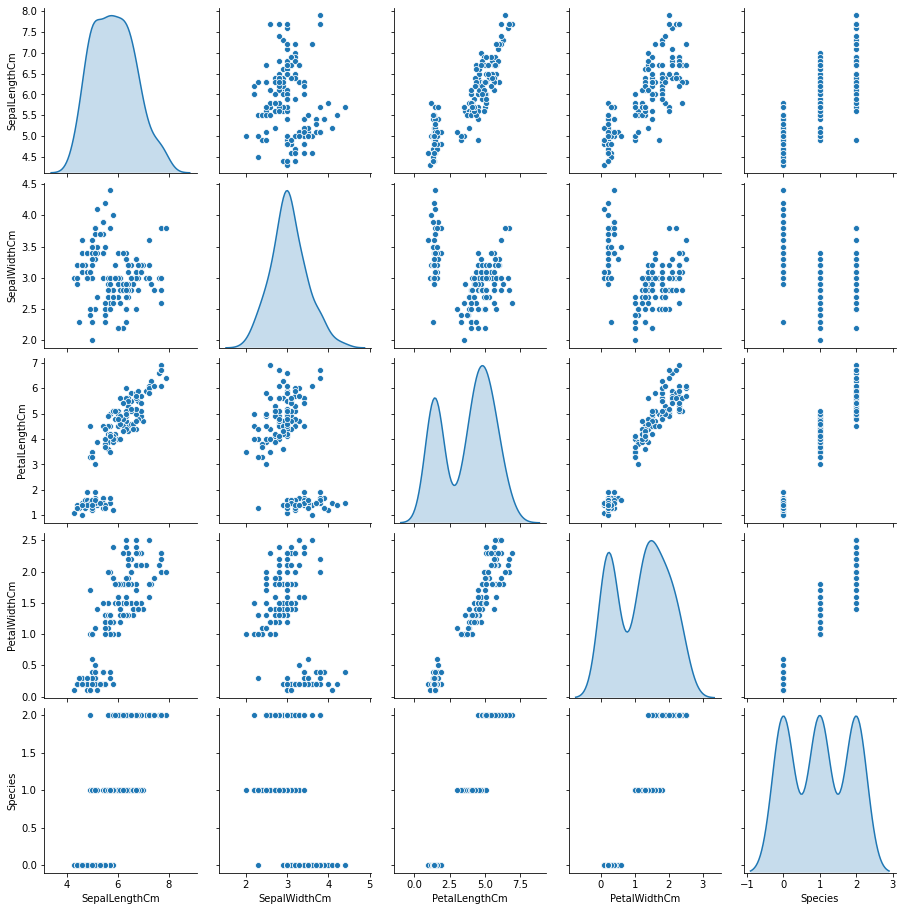

In [38]:
sns.pairplot(data=df,kind='scatter',diag_kind='kde') #Shows relationships among all pairs of features

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

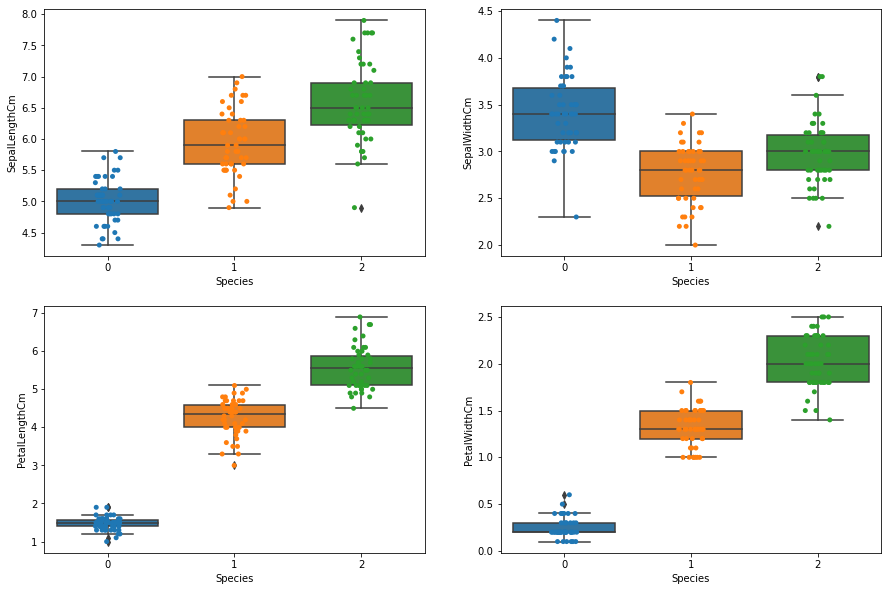

In [43]:
# This is a box plot of the data distribution of each class for each feature. The boxplot is used to identify outliers as well as data dsitribution
# Bottom black horizontal line of blue box plot is minimum value
# First black horizontal line of rectangle shape of blue box plot is First quartile or 25%
# Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
# Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%
# Top black horizontal line of rectangle shape of blue box plot is maximum value.
# Small diamond shape of blue box plot is outlier data or erroneous data.
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df)
sns.stripplot(x = 'Species', y = 'SepalLengthCm', data = df,jitter=True)
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df)
sns.stripplot(x = 'Species', y = 'SepalWidthCm', data = df,jitter=True)
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df)
sns.stripplot(x = 'Species', y = 'PetalLengthCm', data = df,jitter=True)
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df)
sns.stripplot(x = 'Species', y = 'PetalWidthCm', data = df,jitter=True)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

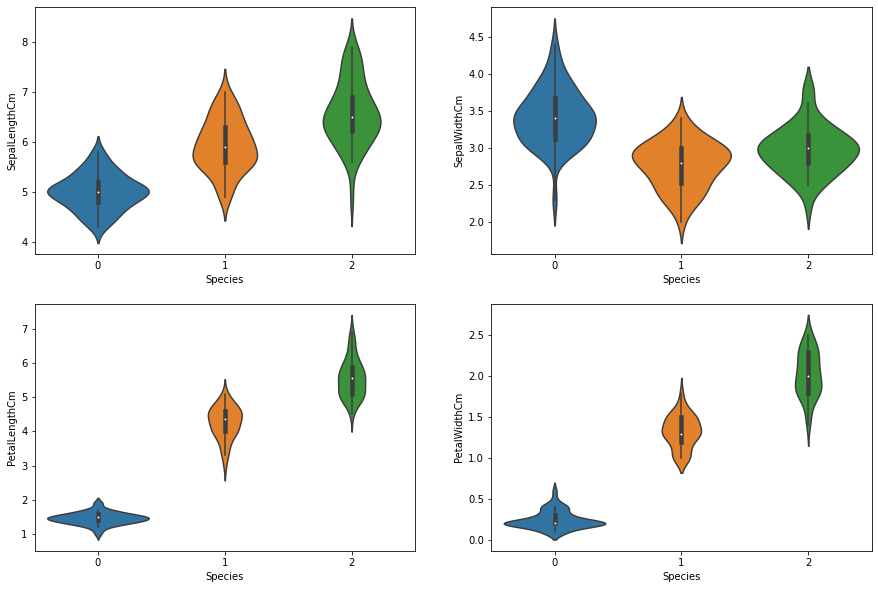

In [44]:
#A combination of the box plot and strip plot can be represented as a violin plot
# The white dot in the middle is the median value and the thick black bar in the centre represents the interquartile range. 
# The thin black line extended from it represents the upper (max) and lower (min) adjacent values in the data.
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = df, size=6)
plt.subplot(2,2,2)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = df, size=6)
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = df, size=6)
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = df, size=6)

In [45]:
# Create X attributes and Y labels from dataframe object
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = df['Species'].values

In [46]:
corr=df.corr() #Correlation Matrix

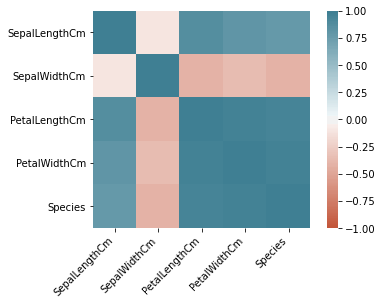

In [47]:
# Display the correlation matrix using a heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [48]:
# Exactly –1. A perfect downhill (negative) linear relationship

# –0.70. A strong downhill (negative) linear relationship

# –0.50. A moderate downhill (negative) relationship

# –0.25. A weak downhill (negative) linear relationship

# 0. No linear relationship


# +0.25. A weak uphill (positive) linear relationship

# +0.50. A moderate uphill (positive) relationship

# +0.70. A strong uphill (positive) linear relationship

# Exactly +1. A perfect uphill (positive) linear relationship

In [49]:
# Create the training and test sets using 0.2 as test size (i.e 80% of data for training rest 20% for model testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
#For choosing the best k value for our KNearestNeighbor Classifier, Let us run the model for different k values (i.e Between 1 and 26) and plot the scores
kvals=range(1,26)
scores={}
scores_list=[]
for k in kvals:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

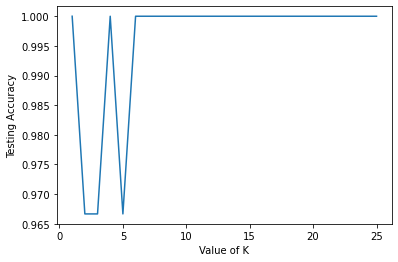

In [52]:
plt.plot(kvals,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Testing Accuracy")

In [53]:
#Here we can see that there were a few initial peak and drops in the accuracy, but after a K value of 5 it increased to 100% and stayed

In [55]:
# Set the final model's K value to 6 and fit the training data and run predictions on test
Finalknn=KNeighborsClassifier(n_neighbors=6)
Finalknn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [56]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #View first 25 predictions against actual values
df1 = df.head(25)
print(df1)

    Actual  Predicted
0        2          2
1        1          1
2        0          0
3        2          2
4        0          0
5        2          2
6        0          0
7        1          1
8        1          1
9        1          1
10       2          2
11       1          1
12       1          1
13       1          1
14       1          1
15       0          0
16       1          1
17       1          1
18       0          0
19       0          0
20       2          2
21       1          1
22       0          0
23       0          0
24       2          2


In [57]:
# Get the confusion Matrix of the Model
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

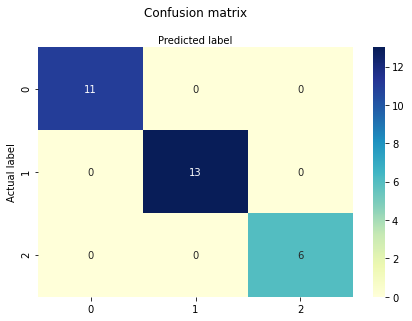

In [58]:
# Plot the Confusion Matrix as a HeatMap
class_names=[0,1,2] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
print(metrics.classification_report(y, Finalknn.predict(X))) # Displays a comprehensive Report of the KNN Model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

